In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
imagen = plt.imread('Fotos/SM_134/1.tif')

imagen.shape

(336, 514, 3)

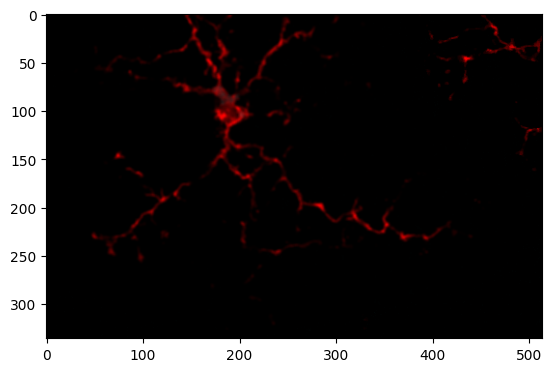

In [22]:
plt.imshow(imagen)

Ahora vamos a querer generar dos arrays nuevos usando el canal verde. Uno que tenga la información del canal verde donde el rojo sea positivo (canal_verde_sobre_rojo) y otro que tenga la información del canal verde donde el canal rojo sea negativo (canal_verde_anti_rojo)

In [ ]:
#Creamos dos arrays nuevos, uno con el canal rojo y otro con el verde.
canal_rojo = imagen[:,:,0] #Canal rojo
canal_verde = imagen[:,:,1] #Canal verde

In [ ]:
#Creo dos copias del canal verde para modificarlo
canal_verde_sobre_rojo = canal_verde.copy()
canal_verde_anti_rojo = canal_verde.copy()

#Usando la info del canal rojo, mofifico el verde
canal_verde_sobre_rojo[canal_rojo == 0] = 0
canal_verde_anti_rojo[canal_rojo != 0] = 0

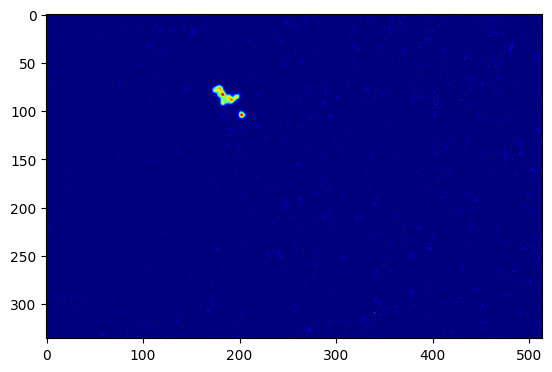

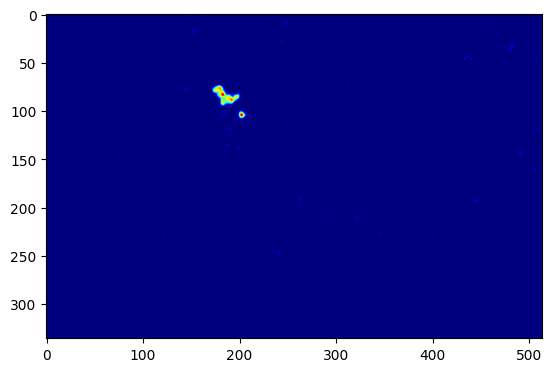

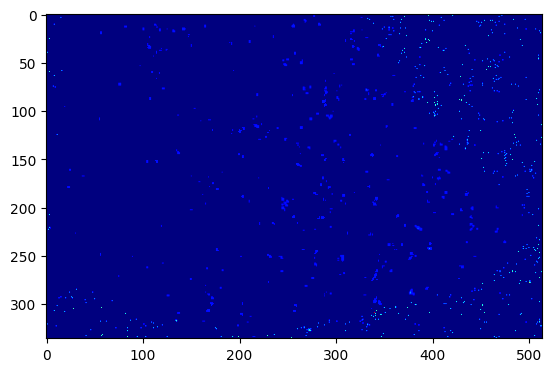

In [53]:
# cmaps en https://matplotlib.org/stable/users/explain/colors/colormaps.html


plt.imshow(canal_verde, cmap = 'jet')
plt.show()
plt.imshow(canal_verde_sobre_rojo, cmap = 'jet')
plt.show()
plt.imshow(canal_verde_anti_rojo, cmap = 'jet')
plt.show()



Cuantificación
Ahora vamos a querer cuantificar la señal en el canal verde en ambos arrays. Podemos hacerlos cuantificando el area positiva (cuantos pixels hay que son >0) o cuantificando la intensidad total por area (sumamos todos los pixels y lo dividimos por la cantidad de pixels >0)